# This code runs on the pickled output of server file:

/home/robbie/uit_mnt/home/romal7177/arctex/ice_cover_server_100

In [16]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import os
import datetime
import tqdm
from ll_xy import lonlat_to_xy
import pickle
import matplotlib.pyplot as plt

ice_cover_dir = '/home/robbie/uit_mnt/home/romal7177/arctex/ice_cover/'

In [15]:
site_name = 'Austfonna'
open_water_thresholds = [0.1,0.3,0.5,0.7]
# site_name = 'Flade Isblink'
# open_water_thresholds = [0.75,0.85]

frames = {}

for radius in [100,200,300,500]:

    list_of_dfs = []

    df = pickle.load(open(f'{ice_cover_dir}{radius}/cover_all_AUST.p','rb'))
    df['doy'] = [x.timetuple().tm_yday for x in df['dt']]

    max_cover = np.nanmax(df['cover'])

    df['norm'] = df['cover']/max_cover

    df.sort_values('dt',inplace=True)

    frames[radius] = df

FileNotFoundError: [Errno 2] No such file or directory: '/home/robbie/uit_mnt/home/romal7177/arctex/ice_cover/300/cover_all_AUST.p'

/tmp/ipykernel_14286/4001725755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=['dt','month','year','day'],inplace=True)
/tmp/ipykernel_14286/4001725755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=['dt','month','year','day'],inplace=True)
/tmp/ipykernel_14286/4001725755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=['dt','month','year','day'],inp

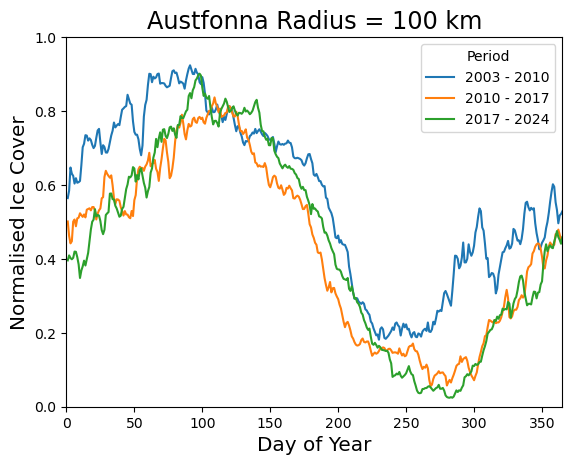

/tmp/ipykernel_14286/4001725755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=['dt','month','year','day'],inplace=True)
/tmp/ipykernel_14286/4001725755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=['dt','month','year','day'],inplace=True)
/tmp/ipykernel_14286/4001725755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=['dt','month','year','day'],inp

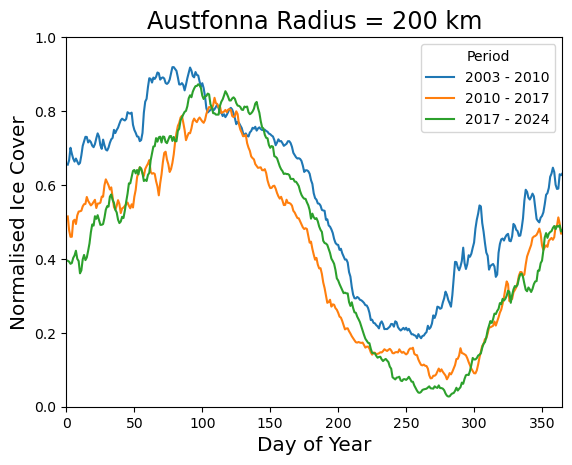

In [3]:
increment=7

for radius in [100,200]:
    
    df = frames[radius]

    for start_year in np.arange(2003,2024,increment):

    #     print(start_year,start_year+5)

        df_period = df[(df['year']>=start_year)&(df['year']<start_year+increment)]

        df_period.drop(columns=['dt','month','year','day'],inplace=True)

        df_period = df_period.groupby('doy').mean()

        df_period = df_period[df_period.index<366]

        plt.plot(df_period.index,df_period['norm'],label=f'{start_year} - {start_year + increment}')


    plt.ylim(0,1)
    plt.ylabel('Normalised Ice Cover',fontsize='x-large')
    plt.xlabel('Day of Year',fontsize='x-large')
    plt.title(f'{site_name} Radius = {radius} km',fontsize='xx-large')
    plt.xlim(0,365)
    plt.legend(title='Period')
    plt.show()

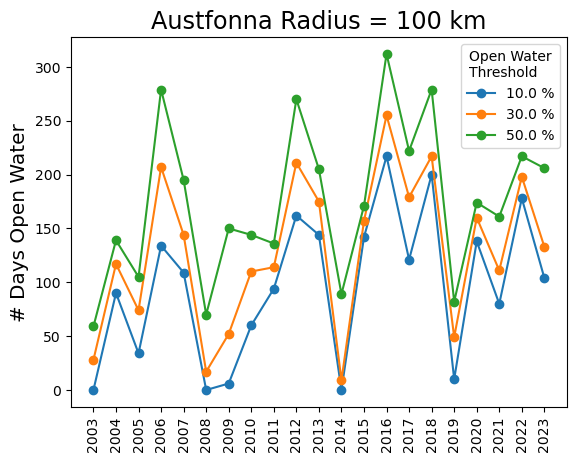

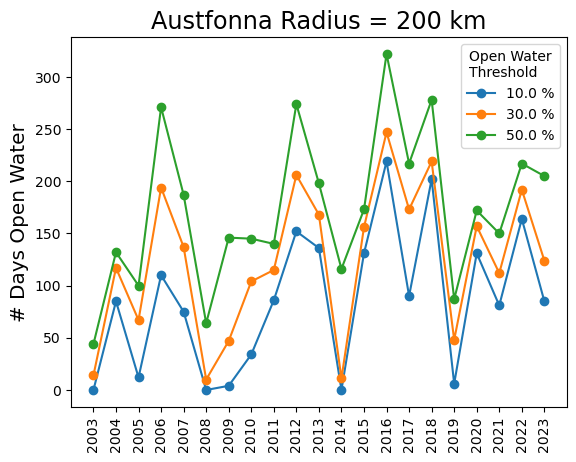

In [4]:
years = np.arange(2003,2024)

for radius in [100,200]:
    
    df = frames[radius]
    
    for thresh in open_water_thresholds:
    
        open_water_days = []

        for year in years:

            df_yr = df[df['year']==year]

            df_yr = df_yr[df_yr['norm']<thresh]

            open_water_days.append( df_yr.shape[0] )

        plt.plot(years,open_water_days,marker='o',label=f'{thresh*100} %')
        
    plt.xticks(years,rotation=90)
    plt.legend(title='Open Water\nThreshold')
    plt.ylabel('# Days Open Water',fontsize='x-large')
    plt.title(f'{site_name} Radius = {radius} km',fontsize='xx-large')
    plt.show()

In [12]:
years = np.arange(2003,2024)

data = {}

for radius in [100,200]:

    data[radius]={}
    
    df = frames[radius]
    
    for thresh in open_water_thresholds:
    
        open_water_days = []

        for year in years:

            df_yr = df[df['year']==year]

            df_yr = df_yr[df_yr['norm']<thresh]

            open_water_days.append( {'year':year,'days_OW':df_yr.shape[0] })


        data[radius][thresh]=open_water_days

    #     plt.plot(years,open_water_days,marker='o',label=f'{thresh*100} %')
        
    # plt.xticks(years,rotation=90)
    # plt.legend(title='Open Water\nThreshold')
    # plt.ylabel('# Days Open Water',fontsize='x-large')
    # plt.title(f'{site_name} Radius = {radius} km',fontsize='xx-large')
    # plt.show()

In [14]:
pd.DataFrame(data[100][0.1])

,year,days_OW
0,2003,0
1,2004,90
2,2005,34
3,2006,134
4,2007,109
5,2008,0
6,2009,6
7,2010,60
8,2011,94
9,2012,162


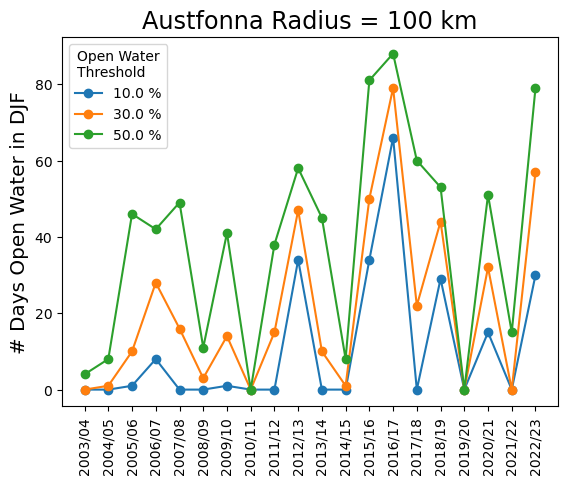

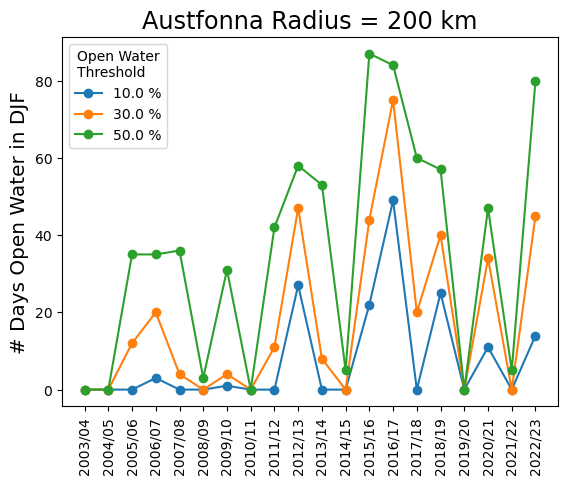

In [5]:
years = np.arange(2004,2024)

ticks = [f'{x-1}/{str(x)[-2:]}' for x in years]

for radius in [100,200]:
    
    df = frames[radius]
    
    for thresh in open_water_thresholds:
    
        open_water_days = []

        for year in years:

            df_yr = df[df['year']==year]
            
            df_yr = df_yr[(df_yr['doy']<59)]

            df_yr = df_yr[df_yr['norm']<thresh]
            
            days0 =  df_yr.shape[0]
            
            df_yr = df[df['year']==year-1]
            
            df_yr = df_yr[(df_yr['doy']>365-31)]

            df_yr = df_yr[df_yr['norm']<thresh]
            
            days1 =  df_yr.shape[0]
            
            open_water_days.append(days0+days1)

        plt.plot(years,open_water_days,marker='o',label=f'{thresh*100} %')
        
    plt.xticks(years,rotation=90,labels=ticks)
    plt.legend(title='Open Water\nThreshold')
    plt.ylabel('# Days Open Water in DJF',fontsize='x-large')
    plt.title(f'{site_name} Radius = {radius} km',fontsize='xx-large')
    plt.show()

(4, 7)